In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1
# load the x,y,z body accelerations test data
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
# concatenate the arrays along the last dimension
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)
# (using None here adds an extra dimension of size 1 to the end of the array)
# follow the same approach for the train data
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xtrain = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)

In [3]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7352, 128, 3)
(2947, 128, 3)
(7352,)
(2947,)


In [4]:
labels=open('/home/jovyan/datasets/UCI_HAR_DATASET/activity_labels.txt')

In [5]:
#testing numberical lables. 
l=(np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt'))

In [6]:
#what do the numbers 
print(labels.read())

1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING



In [7]:
#plots of samples

Text(0.5, 1.0, 'STANDING')

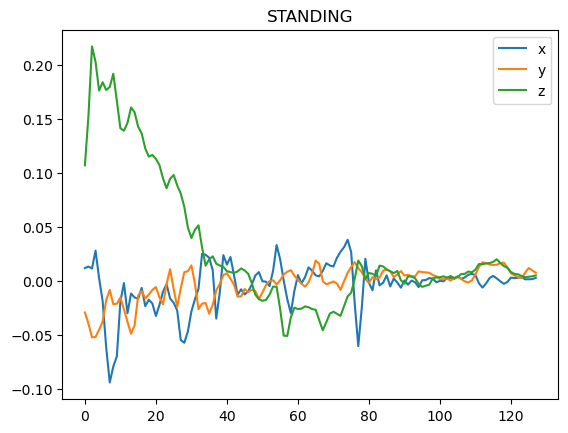

In [11]:
#plot first row of test data
plt.plot(xtest[np.where(l == 5)[0][0]])
plt.legend(["x", "y",'z'])
plt.title('STANDING')

Text(0.5, 1.0, 'SITTING')

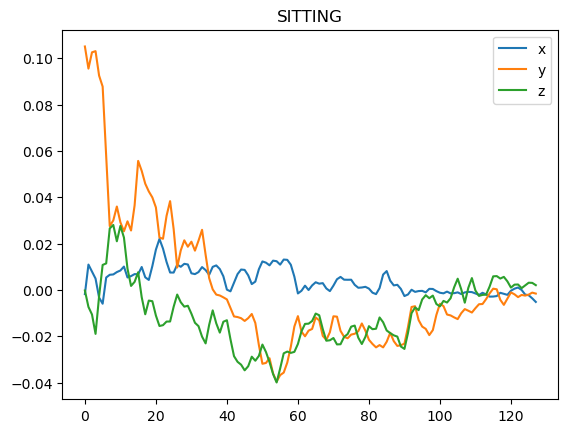

In [12]:
plt.plot(xtest[np.where(l == 4)[0][0]])
plt.legend(["x", "y",'z'])
plt.title('SITTING')

Text(0.5, 1.0, 'WALKING')

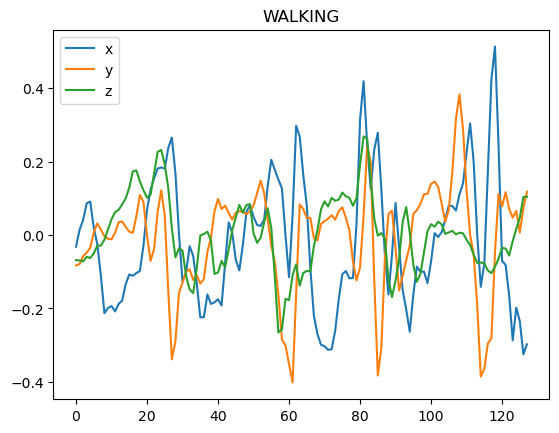

In [13]:
plt.plot(xtest[np.where(l == 1)[0][0]])
plt.legend(["x", "y",'z'])
plt.title('WALKING')

Text(0.5, 1.0, 'LAYING')

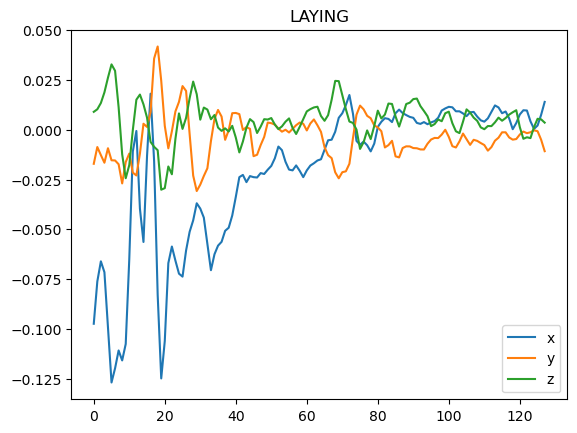

In [14]:
plt.plot(xtest[np.where(l == 6)[0][0]])
plt.legend(["x", "y",'z'])
plt.title('LAYING')

In [15]:
#create validation set from the training set

In [8]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2)

In [31]:
#convert to one hot encoding

In [32]:
y_input = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [33]:
#reshape the data
X_train = tf.reshape(X_train, (-1,128*3))
X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.reshape(X_test, (-1,128*3))
X_test = tf.cast(X_test, dtype=tf.float32)

In [34]:
#flattened out arrays
print ('X_train samples = ' + str(X_train.shape))
print ('y_input samples = ' + str(y_input.shape))

X_train samples = (5881, 384)
y_input samples = (5881, 6)


In [14]:
#weights and offset value
W = tf.Variable(tf.zeros([384,6]))
b = tf.Variable(tf.zeros([6]))

In [15]:
#multinomial logistic regression
# predicted probability for each class - soft max activation layer
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

# cross entropy loss function
def loss(x,y):
    y_ = y_pred(x)
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

In [19]:
#train the model
train_steps = 7000
# learning rate
lr = 0.1
# gradient descent optimizer
optimizer = tf.keras.optimizers.Adam(lr)

In [20]:
#set up training loop

for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(X_train,y_input)
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W ,b]))
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Loss = ' + str(current_loss))

Training Step:0  Loss = tf.Tensor(1.5922769, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(1.5914195, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(1.5913877, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(1.591422, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(1.5913512, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(1.5913321, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(1.5916979, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(1.5915153, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(1.5924448, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(1.5918194, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(1.5913364, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(1.5912986, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(1.5913919, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(1.5912097, shape=(), dtype=

In [26]:
#accuracy - start with accuracy on the training data
def accuracy(x,y):
    y_ = y_pred(x)
    # calculate where the prediction equals the label
    correct = tf.math.equal(tf.math.argmax(y_,axis=-1),tf.math.argmax(y,axis=-1))
    # convert to a float (previously boolean)
    correct = tf.cast(correct,dtype=tf.float32)
    # return the mean to give the overall accuracy
    return tf.math.reduce_mean(correct)

In [27]:
accuracy(X_train, y_input)

<tf.Tensor: shape=(), dtype=float32, numpy=0.40622345>

In [28]:
#accuracy on validation data
accuracy(X_test, y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.2889191>

In [29]:
#VERY LOW ACCURACY!!!

In [15]:
#tensorboard
# Set up logging.
logdir = '/home/jovyan/logs'
writer = tf.summary.create_file_writer(logdir)

In [31]:
#record the accuracy
with writer.as_default():
    for i in range(train_steps):
        with tf.GradientTape() as tape:
            current_loss = loss(X_train,y_input)
        gradients = tape.gradient(current_loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W ,b]))
        # calculate the validation accuracy
        val_acc = accuracy(X_train,y_input)
        # write the value to tensorboard
        tf.summary.scalar('val_acc', val_acc, step=i)

In [34]:
%tensorboard --logdir tflogs

UsageError: Line magic function `%tensorboard` not found.


In [82]:
#record the loss 
with writer.as_default():
    for i in range(train_steps):
        with tf.GradientTape() as tape:
            current_loss = loss(X_train,y_input)
        gradients = tape.gradient(current_loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W ,b]))
        # write the value to tensorboard
        tf.summary.scalar('loss', current_loss, step=i)

In [ ]:
#Part 2 - CNN

In [35]:
#split data into validataion
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2)

In [36]:
X_train.shape

(5881, 128, 3)

In [37]:
#one-hot encoding
y_train_input = tf.keras.utils.to_categorical(y_train)
y_test_input = tf.keras.utils.to_categorical(y_test)

In [38]:
X_train.shape

(5881, 128, 3)

In [39]:
#create model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Activation
from tensorflow.keras.layers import BatchNormalization
from keras import layers
from keras.layers.pooling import GlobalAveragePooling1D
from tensorflow.keras.layers import InputLayer


model = Sequential()
model.add(InputLayer(input_shape=(128,3)))
#add layers
model.add(Conv1D(filters=32, kernel_size=4, activation=tf.nn.relu, padding='same'))
model.add(BatchNormalization())
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation=tf.nn.softmax))

In [40]:
#compile model
#compile model using accuracy to measure model performance
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(X_train, y_train_input, epochs=600, batch_size=200,
			validation_data=(X_test, y_test_input))

Epoch 1/600
30/30 [==============================] - 0s 5ms/step - loss: 0.1053 - accuracy: 0.8606 - val_loss: 0.1287 - val_accuracy: 0.8137
Epoch 2/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1040 - accuracy: 0.8653 - val_loss: 0.1304 - val_accuracy: 0.8083
Epoch 3/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.8638 - val_loss: 0.1220 - val_accuracy: 0.8749
Epoch 4/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.8643 - val_loss: 0.1252 - val_accuracy: 0.8362
Epoch 5/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1046 - accuracy: 0.8618 - val_loss: 0.1236 - val_accuracy: 0.8375
Epoch 6/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.8665 - val_loss: 0.1219 - val_accuracy: 0.8647
Epoch 7/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.8699 - val_loss: 0.1218 - val_accuracy: 0.8763
Epoch 8/600
3

In [52]:
#Assessing the accuracy
predictions = model.predict(X_test)

In [53]:
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test)/len(y_test))

test accuracy:  0.8769544527532291


In [54]:
#plot results
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
 #   plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
#    ax.xaxis.set_major_locator(MultipleLocator(5))
 #   ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()



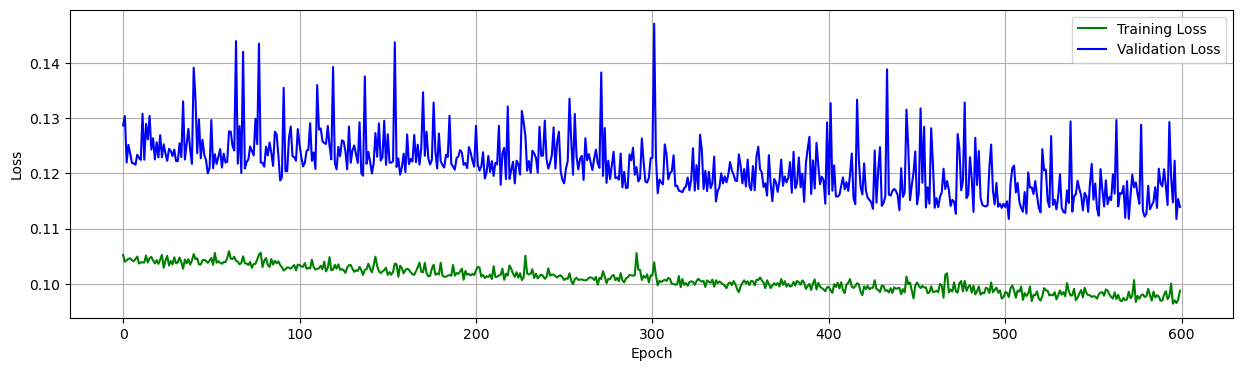

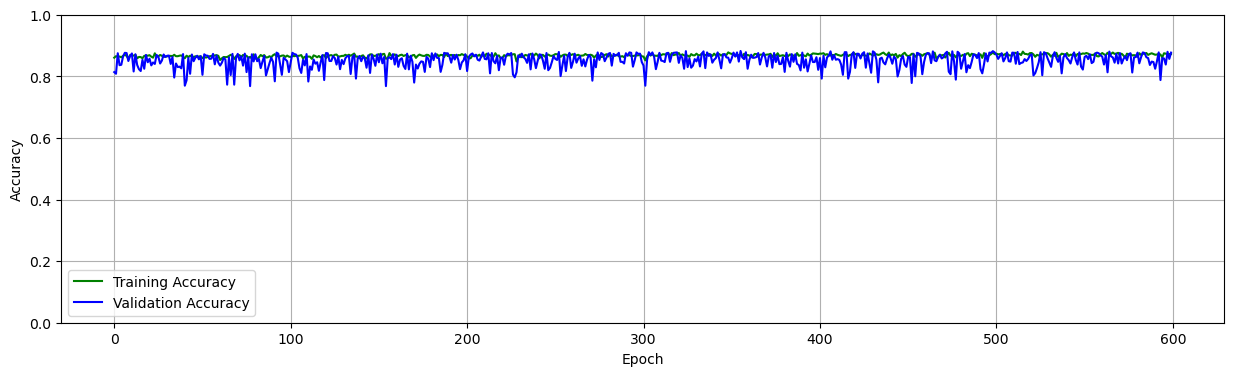

In [55]:
# Retrieve training results.
train_loss = fit.history["loss"]
train_acc  = fit.history["accuracy"]
valid_loss = fit.history["val_loss"]
valid_acc  = fit.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [58]:
#what happens when we alter the kernal size and number of filters?
model = Sequential()
model.add(InputLayer(input_shape=(128,3)))
#add layers
model.add(Conv1D(filters=64, kernel_size=8, activation=tf.nn.relu, padding='same'))
model.add(BatchNormalization())
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation=tf.nn.softmax))


In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(X_train, y_train_input, epochs=600, batch_size=200,
			validation_data=(X_test, y_test_input))

Epoch 1/600
30/30 [==============================] - 1s 12ms/step - loss: 0.3868 - accuracy: 0.4846 - val_loss: 0.4423 - val_accuracy: 0.2454
Epoch 2/600
30/30 [==============================] - 0s 4ms/step - loss: 0.3353 - accuracy: 0.5729 - val_loss: 0.4348 - val_accuracy: 0.3494
Epoch 3/600
30/30 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.5962 - val_loss: 0.4270 - val_accuracy: 0.3542
Epoch 4/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.6121 - val_loss: 0.4182 - val_accuracy: 0.5867
Epoch 5/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.6247 - val_loss: 0.4081 - val_accuracy: 0.5928
Epoch 6/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.6341 - val_loss: 0.3974 - val_accuracy: 0.5962
Epoch 7/600
30/30 [==============================] - 0s 5ms/step - loss: 0.2662 - accuracy: 0.6495 - val_loss: 0.3852 - val_accuracy: 0.6111
Epoch 8/600


In [61]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test)/len(y_test))

test accuracy:  0.8599592114208022


In [62]:
#what happens when we alter the kernal size and number of filters?
model = Sequential()
model.add(InputLayer(input_shape=(128,3)))
#add layers
model.add(Conv1D(filters=16, kernel_size=2, activation=tf.nn.relu, padding='same'))
model.add(BatchNormalization())
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# create a callback that will stop training if the validation loss hasn't improved for 2 epochs

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(X_train, y_train_input, epochs=600, batch_size=200,
			validation_data=(X_test, y_test_input))

Epoch 1/600
30/30 [==============================] - 1s 10ms/step - loss: 0.4504 - accuracy: 0.3093 - val_loss: 0.4487 - val_accuracy: 0.1441
Epoch 2/600
30/30 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.3828 - val_loss: 0.4466 - val_accuracy: 0.2135
Epoch 3/600
30/30 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.4430 - val_loss: 0.4433 - val_accuracy: 0.4120
Epoch 4/600
30/30 [==============================] - 0s 4ms/step - loss: 0.3871 - accuracy: 0.4620 - val_loss: 0.4389 - val_accuracy: 0.3963
Epoch 5/600
30/30 [==============================] - 0s 4ms/step - loss: 0.3764 - accuracy: 0.4850 - val_loss: 0.4337 - val_accuracy: 0.4018
Epoch 6/600
30/30 [==============================] - 0s 5ms/step - loss: 0.3670 - accuracy: 0.4858 - val_loss: 0.4274 - val_accuracy: 0.4201
Epoch 7/600
30/30 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.5057 - val_loss: 0.4207 - val_accuracy: 0.4317
Epoch 8/600


In [63]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test)/len(y_test))

test accuracy:  0.8239292997960571


In [ ]:
#Part 3

In [65]:
# load the x,y,z accelerations for the three data streams for each coordinate
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
xxt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_x_test.txt')
yyt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_y_test.txt')
zzt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_z_test.txt')
xxg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_x_test.txt')
yyg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_y_test.txt')
zzg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_z_test.txt')

In [66]:
# concatenate into a single (n,128,9) array
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)

In [68]:
xtest.shape

(2947, 128, 9)

In [70]:
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xxt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_x_train.txt')
yyt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_y_train.txt')
zzt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_z_train.txt')
xxg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_x_train.txt')
yyg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_y_train.txt')
zzg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_z_train.txt')

In [71]:
# concatenate into a single (n,128,9) array
xtrain = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)

In [72]:
xtrain.shape

(7352, 128, 9)

In [73]:
#create validation set
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2)

In [76]:
X_train.shape

(5881, 128, 9)

In [79]:
#one-hot encoding
y_train_input = tf.keras.utils.to_categorical(y_train)
y_test_input = tf.keras.utils.to_categorical(y_test)

In [80]:
model = Sequential()
model.add(InputLayer(input_shape=(128,9)))
#add layers
model.add(Conv1D(filters=32, kernel_size=4, activation=tf.nn.relu, padding='same'))
model.add(BatchNormalization())
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# create a callback that will stop training if the validation loss hasn't improved for 2 epochs

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(X_train, y_train_input, epochs=600, batch_size=200,
			validation_data=(X_test, y_test_input))

Epoch 1/600
30/30 [==============================] - 1s 9ms/step - loss: 0.3741 - accuracy: 0.4953 - val_loss: 0.4055 - val_accuracy: 0.4793
Epoch 2/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.7820 - val_loss: 0.3868 - val_accuracy: 0.5445
Epoch 3/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.8403 - val_loss: 0.3690 - val_accuracy: 0.6044
Epoch 4/600
30/30 [==============================] - 0s 4ms/step - loss: 0.2162 - accuracy: 0.8868 - val_loss: 0.3456 - val_accuracy: 0.6159
Epoch 5/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.9102 - val_loss: 0.3206 - val_accuracy: 0.6295
Epoch 6/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1597 - accuracy: 0.9228 - val_loss: 0.2958 - val_accuracy: 0.6920
Epoch 7/600
30/30 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9316 - val_loss: 0.2734 - val_accuracy: 0.7145
Epoch 8/600
3

In [81]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test)/len(y_test))

test accuracy:  0.9775662814411965


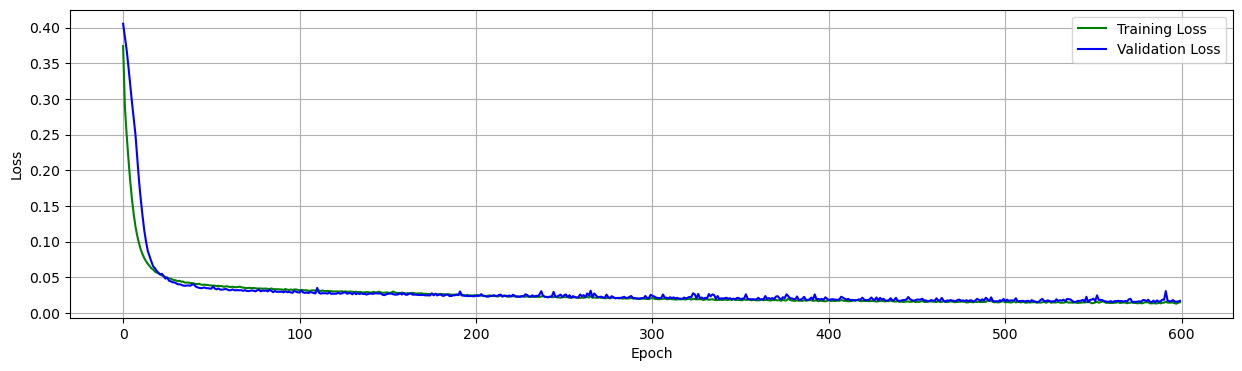

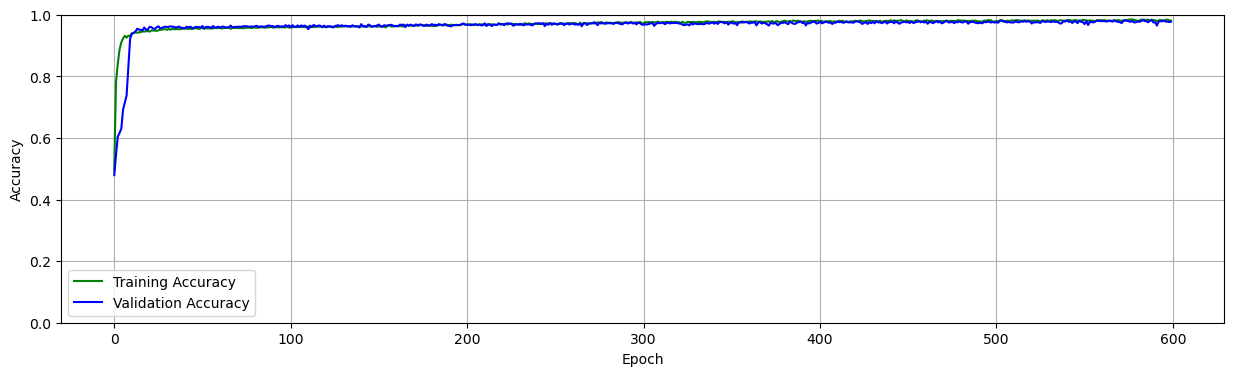

In [82]:
#plot results
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
 #   plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
#    ax.xaxis.set_major_locator(MultipleLocator(5))
 #   ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

# Retrieve training results.
train_loss = fit.history["loss"]
train_acc  = fit.history["accuracy"]
valid_loss = fit.history["val_loss"]
valid_acc  = fit.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
#calculating test accuracy on all different models. 

In [ ]:
#part 1

In [25]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1
# load the x,y,z body accelerations test data
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
# concatenate the arrays along the last dimension
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)
# (using None here adds an extra dimension of size 1 to the end of the array)
# follow the same approach for the train data
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xtrain = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)

labels=open('/home/jovyan/datasets/UCI_HAR_DATASET/activity_labels.txt')

X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2)

y_input = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
ytest = tf.keras.utils.to_categorical(ytest)
ytrain = tf.keras.utils.to_categorical(ytrain)



In [26]:
#reshape the data
xtrain = tf.reshape(xtrain, (-1,128*3))
xtrain = tf.cast(xtrain, dtype=tf.float32)
xtest = tf.reshape(xtest, (-1,128*3))
xtest = tf.cast(xtest, dtype=tf.float32)

In [27]:
#weights and offset value
W = tf.Variable(tf.zeros([384,6]))
b = tf.Variable(tf.zeros([6]))

In [28]:
#multinomial logistic regression
# predicted probability for each class - soft max activation layer
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

# cross entropy loss function
def loss(x,y):
    y_ = y_pred(x)
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

In [29]:
#train the model
train_steps = 7000
# learning rate
lr = 0.1
# gradient descent optimizer
optimizer = tf.keras.optimizers.Adam(lr)

#set up training loop

for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(xtrain,ytrain)
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W ,b]))
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Loss = ' + str(current_loss))

Training Step:0  Loss = tf.Tensor(1.7917595, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(1.6536027, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(1.6393298, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(1.6344985, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(1.6327721, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(1.6334476, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(1.6323915, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(1.6316267, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(1.6306598, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(1.6305281, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(1.6322483, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(1.630658, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(1.6300975, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(1.6312823, shape=(), dtype=

In [30]:
#accuracy - start with accuracy on the training data
def accuracy(x,y):
    y_ = y_pred(x)
    # calculate where the prediction equals the label
    correct = tf.math.equal(tf.math.argmax(y_,axis=-1),tf.math.argmax(y,axis=-1))
    # convert to a float (previously boolean)
    correct = tf.cast(correct,dtype=tf.float32)
    # return the mean to give the overall accuracy
    return tf.math.reduce_mean(correct)

In [31]:
accuracy(xtrain, ytrain)

<tf.Tensor: shape=(), dtype=float32, numpy=0.39186615>

In [32]:
#accuracy on validation data
accuracy(xtest , ytest )

<tf.Tensor: shape=(), dtype=float32, numpy=0.30810994>

In [ ]:
#calculating test accuracy on all different models. 
#part 2

In [43]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1
# load the x,y,z body accelerations test data
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
# concatenate the arrays along the last dimension
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)
# (using None here adds an extra dimension of size 1 to the end of the array)
# follow the same approach for the train data
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xtrain = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None]),axis=2)

labels=open('/home/jovyan/datasets/UCI_HAR_DATASET/activity_labels.txt')

X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2)

#y_input = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)
y_test = tf.keras.utils.to_categorical(ytest)
y_train = tf.keras.utils.to_categorical(ytrain)

In [44]:
#create model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Activation
from tensorflow.keras.layers import BatchNormalization
from keras import layers
from keras.layers.pooling import GlobalAveragePooling1D
from tensorflow.keras.layers import InputLayer


model = Sequential()
model.add(InputLayer(input_shape=(128,3)))
#add layers
model.add(Conv1D(filters=32, kernel_size=4, activation=tf.nn.relu, padding='same'))
model.add(BatchNormalization())
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation=tf.nn.softmax))

In [45]:
#compile model
#compile model using accuracy to measure model performance
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# create a callback that will stop training if the validation loss hasn't improved for 2 epochs

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(xtrain, y_train, epochs=600, batch_size=200,
			validation_data=(xtest, y_test))

Epoch 1/600
37/37 [==============================] - 1s 10ms/step - loss: 0.3885 - accuracy: 0.4425 - val_loss: 0.4428 - val_accuracy: 0.2640
Epoch 2/600
37/37 [==============================] - 0s 6ms/step - loss: 0.3552 - accuracy: 0.5393 - val_loss: 0.4373 - val_accuracy: 0.2016
Epoch 3/600
37/37 [==============================] - 0s 6ms/step - loss: 0.3355 - accuracy: 0.5642 - val_loss: 0.4306 - val_accuracy: 0.4411
Epoch 4/600
37/37 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.5851 - val_loss: 0.4225 - val_accuracy: 0.4706
Epoch 5/600
37/37 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.5891 - val_loss: 0.4127 - val_accuracy: 0.5385
Epoch 6/600
37/37 [==============================] - 0s 5ms/step - loss: 0.2971 - accuracy: 0.5948 - val_loss: 0.4021 - val_accuracy: 0.5358
Epoch 7/600
37/37 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.6072 - val_loss: 0.3886 - val_accuracy: 0.5721
Epoch 8/600


In [46]:
#Assessing the accuracy
predictions = model.predict(xtest)

In [47]:
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==ytest)/len(ytest))


test accuracy:  0.8510349507974211


In [ ]:
#part 3 - cnn on testing data

In [48]:
# load the x,y,z accelerations for the three data streams for each coordinate
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
xxt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_x_test.txt')
yyt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_y_test.txt')
zzt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_z_test.txt')
xxg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_x_test.txt')
yyg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_y_test.txt')
zzg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_z_test.txt')

# concatenate into a single (n,128,9) array
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)

xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xxt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_x_train.txt')
yyt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_y_train.txt')
zzt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_z_train.txt')
xxg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_x_train.txt')
yyg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_y_train.txt')
zzg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_z_train.txt')

# concatenate into a single (n,128,9) array
xtrain = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)

In [49]:
#one-hot encoding
y_train_input = tf.keras.utils.to_categorical(ytrain)
y_test_input = tf.keras.utils.to_categorical(ytest)


model = Sequential()
model.add(InputLayer(input_shape=(128,9)))
#add layers
model.add(Conv1D(filters=32, kernel_size=4, activation=tf.nn.relu, padding='same'))
model.add(BatchNormalization())
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Activation('relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=6, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

# train the model
fit = model.fit(xtrain, y_train_input, epochs=600, batch_size=200,
			validation_data=(xtest, y_test_input))

Epoch 1/600
37/37 [==============================] - 1s 20ms/step - loss: 0.4057 - accuracy: 0.3085 - val_loss: 0.4174 - val_accuracy: 0.3461
Epoch 2/600
37/37 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.7669 - val_loss: 0.3904 - val_accuracy: 0.6895
Epoch 3/600
37/37 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.8697 - val_loss: 0.3662 - val_accuracy: 0.6722
Epoch 4/600
37/37 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.9089 - val_loss: 0.3435 - val_accuracy: 0.6060
Epoch 5/600
37/37 [==============================] - 0s 6ms/step - loss: 0.1628 - accuracy: 0.9260 - val_loss: 0.3168 - val_accuracy: 0.6247
Epoch 6/600
37/37 [==============================] - 0s 5ms/step - loss: 0.1369 - accuracy: 0.9340 - val_loss: 0.2884 - val_accuracy: 0.6671
Epoch 7/600
37/37 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9368 - val_loss: 0.2578 - val_accuracy: 0.7177
Epoch 8/600


In [51]:
predictions = model.predict(xtest)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy: ', np.sum(y_pred==ytest)/len(ytest))

test accuracy:  0.9270444519850696
